#### Question: d)	What is the difference between Bagging Classifier and voting classifier. Explain the working of both the algorithms.

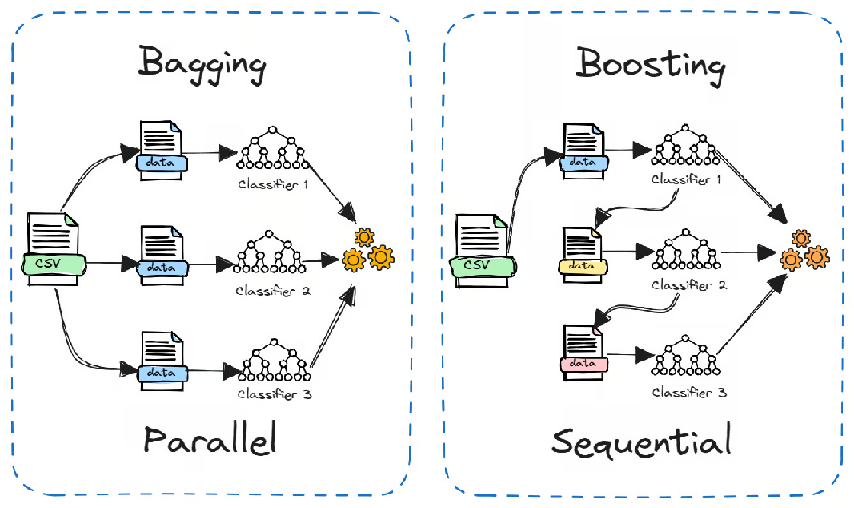

## Bagging Classifier :

*   **Ensemble Learning:** Bagging is a type of ensemble learning method. Ensemble methods combine the predictions of multiple base models to produce a more accurate and stable prediction than any individual model could achieve.
*   **Bootstrap Aggregating:** "Bagging" is short for "Bootstrap Aggregating".
    *   **Bootstrap:** It involves creating multiple subsets of the original training data by sampling *with replacement*.
    *   **Aggregating:** Each subset trains a separate instance of the same base classifier (e.g., a decision tree). The final prediction aggregates these predictions, typically by majority voting (classification) or averaging (regression).

## How does it work?

1.  **Bootstrap Sampling:** Create 'n' bootstrap samples from the original dataset (sampling with replacement).
2.  **Base Model Training:** Train a base classifier on each of the 'n' bootstrap samples independently.
3.  **Prediction Aggregation:**
    *   **Classification:** The final prediction is the class with the most votes.
    *   **Regression:** The final prediction is the average of all predictions.

## When to use Bagging Classifiers?

*   **High Variance Models:** Effective for models with high variance (e.g., decision trees).
*   **Complex Datasets:** Improves accuracy and stability on complex datasets.
*   **Improving Generalization:** Helps the model perform well on unseen data.

## Where are Bagging Classifiers used?

*   **Machine Learning:** Widely used in various applications.
*   **Random Forests:** An extension of bagging with decision trees and feature randomness.
*   **Various Domains:** Image classification, medical diagnosis, financial modeling, NLP, etc.

## Advantages and Limitations

**Advantages:**

*   Improved Accuracy
*   Reduced Overfitting
*   Robustness
*   Easy Parallelization

**Limitations:**

*   Reduced Interpretability
*   Higher Computational Cost



### Example Baggging Classifier using scikit-learn (Python):

In [7]:

# In a Code cell:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
import warnings 
warnings.filterwarnings("ignore", category=FutureWarning)

X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

bagging_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
bagging_clf.fit(X_train, y_train)
y_pred = bagging_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8633333333333333



#### Voting Classifier

A Voting Classifier is an ensemble machine learning algorithm that combines the predictions from multiple other classification models. Instead of relying on a single model's prediction, it aggregates the predictions of several models to make a final prediction. This often leads to improved accuracy and robustness compared to using individual models.

There are two main types:

1.  **Hard Voting:** Each classifier "votes" for a class, and the class with the majority of votes is the final prediction.
2.  **Soft Voting:** Each classifier provides a probability or confidence score for each class. The probabilities are then averaged or summed, and the class with the highest average probability is chosen. Soft voting often performs better.

## How it works:

1.  **Train multiple classifiers:** Train several different classification models on the same training data.
2.  **Combine predictions:**
    *   **Hard Voting:** The class with the most votes is the final prediction.
    *   **Soft Voting:** The class with the highest average probability is the final prediction.

## When to use Voting Classifiers:

*   **Diverse Models:** Most effective when base models have different strengths and weaknesses.
*   **Improved Accuracy:** Can often achieve higher accuracy than individual models.
*   **Robustness:** More robust to noise and outliers.
*   **Ensemble Learning:** A type of ensemble learning method.

## Advantages:

*   Increased Accuracy
*   Improved Robustness
*   Simple Implementation

## Disadvantages:

*   Computational Cost
*   Interpretability
*   Performance Dependence (on base models)


### Example Voting Classifier using scikit-learn (Python):

In [3]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

# Generate a sample dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create individual classifiers
clf1 = LogisticRegression(random_state=1)
clf2 = DecisionTreeClassifier(random_state=1)
clf3 = SVC(probability=True, random_state=1)  # probability=True is needed for soft voting

# Create the voting classifier (soft voting)
eclf_soft = VotingClassifier(estimators=[('lr', clf1), ('dt', clf2), ('svc', clf3)], voting='soft')
eclf_soft.fit(X_train, y_train)
y_pred_soft = eclf_soft.predict(X_test)
accuracy_soft = accuracy_score(y_test, y_pred_soft)
print(f"Soft Voting Accuracy: {accuracy_soft}")

# Create the voting classifier (hard voting)
eclf_hard = VotingClassifier(estimators=[('lr', clf1), ('dt', clf2), ('svc', clf3)], voting='hard')
eclf_hard.fit(X_train, y_train)
y_pred_hard = eclf_hard.predict(X_test)
accuracy_hard = accuracy_score(y_test, y_pred_hard)
print(f"Hard Voting Accuracy: {accuracy_hard}")

print("""
This example demonstrates how to create both hard and soft voting classifiers using `scikit-learn`. Remember that for soft voting, your classifiers must be able to provide probability estimates (e.g., using `probability=True` in `SVC`).
""")

Soft Voting Accuracy: 0.85
Hard Voting Accuracy: 0.8433333333333334

This example demonstrates how to create both hard and soft voting classifiers using `scikit-learn`. Remember that for soft voting, your classifiers must be able to provide probability estimates (e.g., using `probability=True` in `SVC`).



<h3>Difference between Voting Classifier and Bagging Classifier</h3>
<table>
  <tr>
    <th>Aspect</th>
    <th>Voting Classifier</th>
    <th>Bagging Classifier</th>
  </tr>
  <tr>
    <td>Definition</td>
    <td>Combines the predictions of multiple models (could be different models or the same model with different parameters) to make a final prediction.</td>
    <td>Uses multiple instances of the same model trained on different subsets of the data to make a final prediction.</td>
  </tr>
  <tr>
    <td>Model Diversity</td>
    <td>Can use a variety of different models (e.g., Logistic Regression, Decision Trees, SVM, etc.).</td>
    <td>Uses the same model but with different subsets of data (e.g., multiple decision trees in the case of a Bagging Classifier).</td>
  </tr>
  <tr>
    <td>Aggregation Method</td>
    <td>Voting (majority voting for classification or averaging for regression).</td>
    <td>Aggregation of predictions (e.g., averaging the outputs for regression or majority voting for classification).</td>
  </tr>
  <tr>
    <td>Bias-Variance Tradeoff</td>
    <td>Reduces variance by combining different models but doesn't necessarily reduce bias.</td>
    <td>Reduces both bias and variance by combining predictions from multiple instances

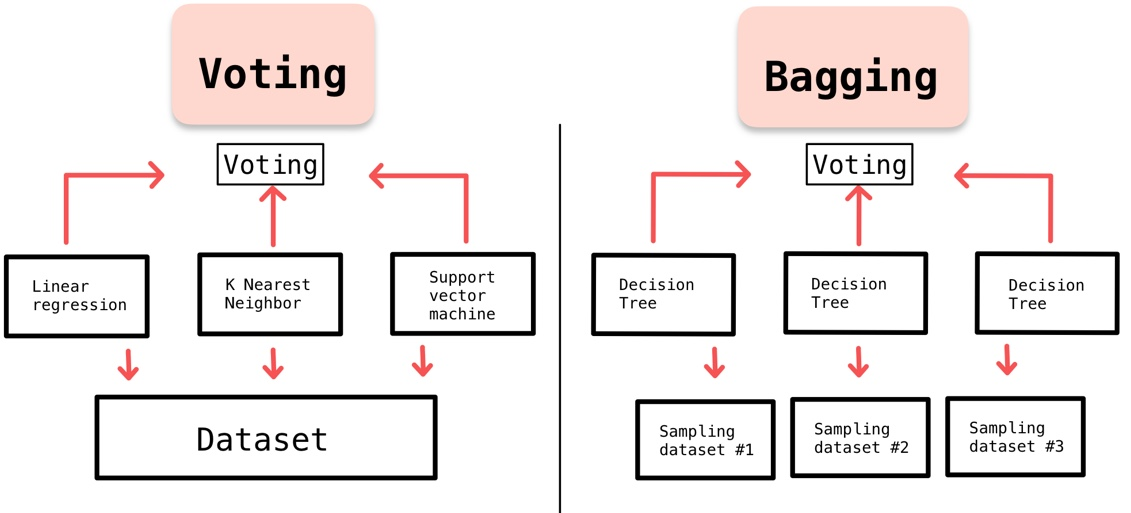

### Quuestion: e)	Explain the Bayes theorem in Naïve Bayes Algorithm.

#### Bayes' Theorem in Naïve Bayes Algorithm

Bayes' Theorem is a mathematical formula used to determine the conditional probability of events. It's a key component of the Naïve Bayes algorithm, which is widely used for classification tasks in machine learning. Let’s break down how it works in this context:

#### Bayes' Theorem
The formula for Bayes' Theorem is:

$$ P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)} $$

Where:
- $P(A|B)$ is the probability of event A occurring given that B is true.
- $P(B|A)$ is the probability of event B occurring given that A is true.
- $P(A)$ and $P(B)$ are the probabilities of observing A and B independently of each other.

## Naïve Bayes Classifier
In the context of Naïve Bayes, the theorem helps us calculate the posterior probability of a class (target) given a set of features (predictors). The term "naïve" comes from the assumption that all predictors are independent of each other, which simplifies the calculations.

Here’s a step-by-step outline:

1. **Calculate Prior Probability**: This is the initial probability of each class. For example, if we’re classifying emails as spam or not spam, we look at the probability of an email being spam or not based on historical data.

2. **Calculate Likelihood**: For each feature, we calculate the likelihood, which is the probability of the feature given the class. If the features are words in an email, we compute the likelihood of each word appearing in spam and not spam emails.

3. **Calculate Evidence**: This is the total probability of the observed data. It can be seen as a normalizing constant ensuring that the probabilities sum up to 1.

4. **Apply Bayes' Theorem**: Using Bayes' Theorem, we combine these probabilities to find the posterior probability of each class given the features. The class with the highest posterior probability is the predicted class.
